# 1. Raw Scans

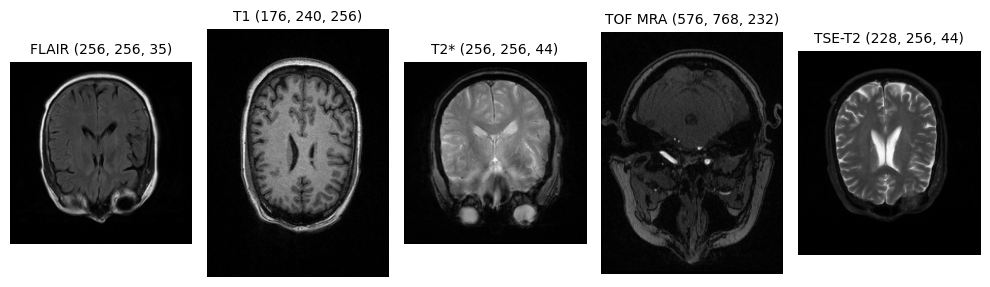

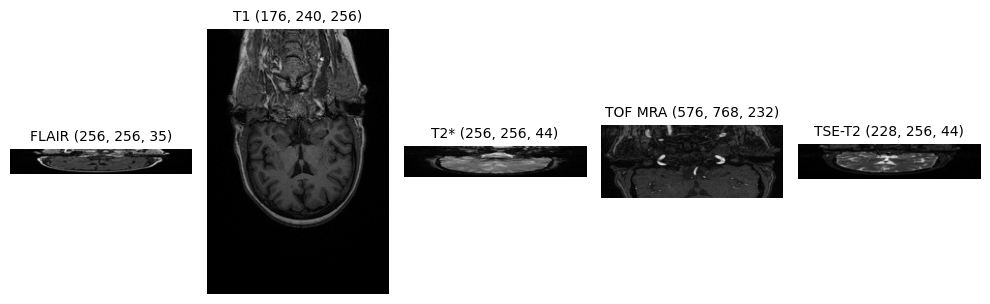

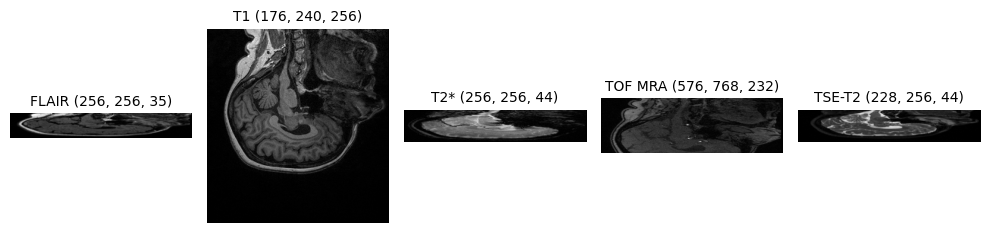

In [1]:
%load_ext autoreload
%autoreload 2

from vis_util import visualize_structural_mri_session

visualize_structural_mri_session("../data/oasis-3/OAS30001_MR_d2430/", slice_fraction=0.55)
visualize_structural_mri_session("../data/oasis-3/OAS30001_MR_d2430/", axis=1)
visualize_structural_mri_session("../data/oasis-3/OAS30001_MR_d2430/", axis=0)

# 2. MONAI Pipeline

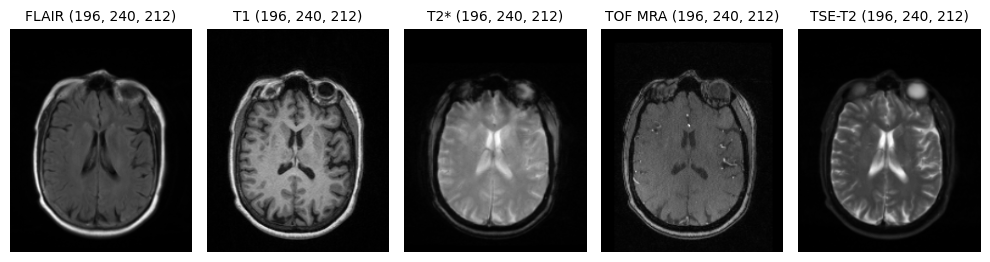

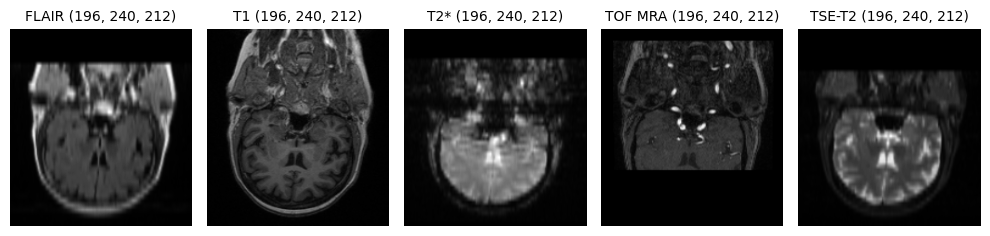

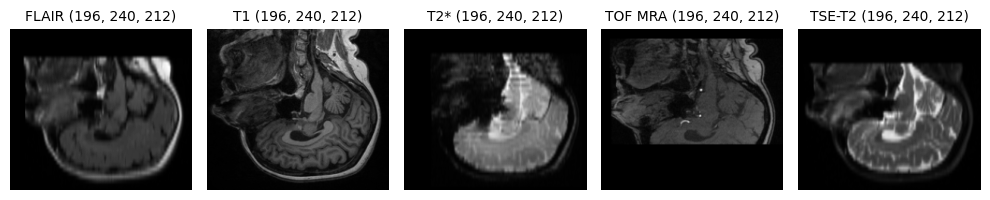

In [4]:
visualize_structural_mri_session("../data/oasis-3-cluster-monai/OAS30001_MR_d2430/", slice_fraction=0.65)
visualize_structural_mri_session("../data/oasis-3-cluster-monai/OAS30001_MR_d2430/", axis=1)
visualize_structural_mri_session("../data/oasis-3-cluster-monai/OAS30001_MR_d2430/", axis=0)

# 3. Skull Stripping

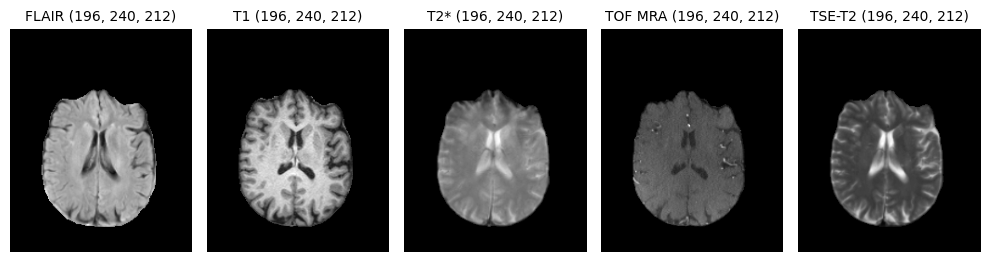

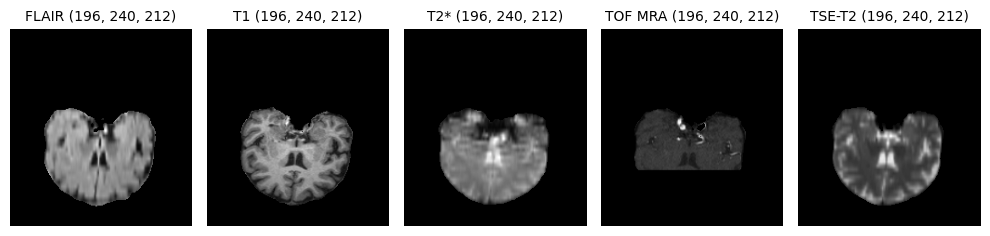

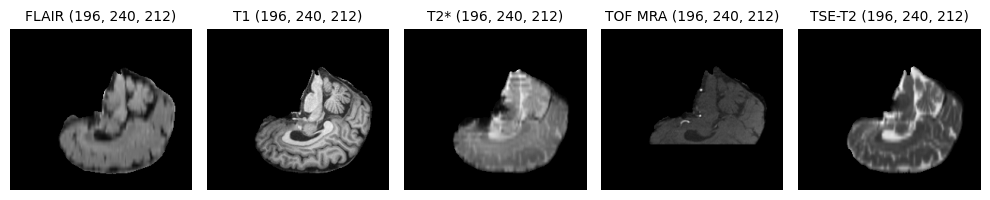

In [5]:
visualize_structural_mri_session("../data/oasis-3-strip-2/OAS30001_MR_d2430/", slice_fraction=0.65)
visualize_structural_mri_session("../data/oasis-3-strip-2/OAS30001_MR_d2430/", axis=1)
visualize_structural_mri_session("../data/oasis-3-strip-2/OAS30001_MR_d2430/", axis=0)

# 3. Intra-session co-registration to T1 scan

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


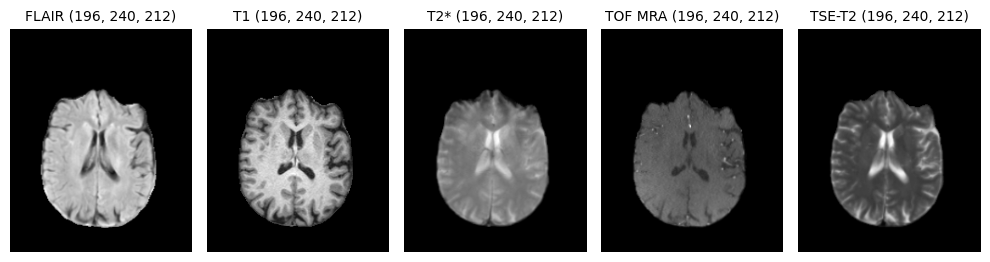

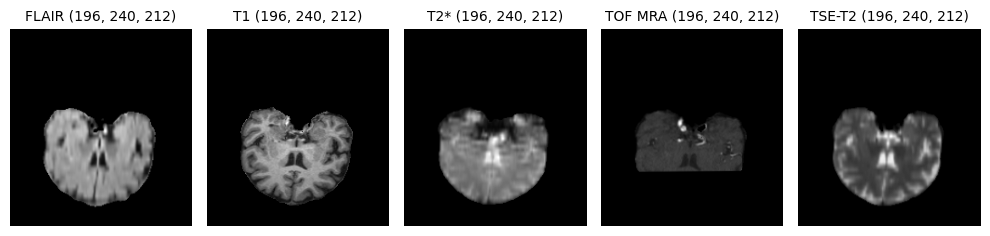

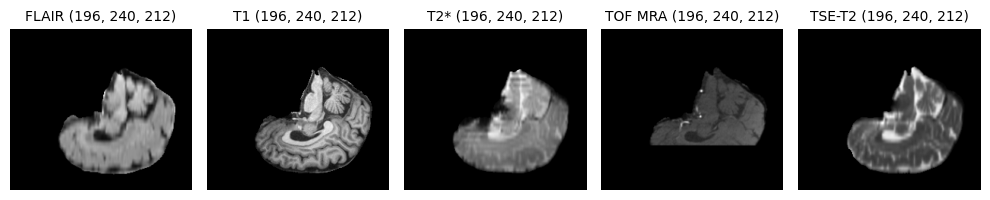

In [10]:
%load_ext autoreload
%autoreload 2

from vis_util import visualize_structural_mri_session

visualize_structural_mri_session("../data/oasis-3-3-regt1/OAS30001_MR_d2430/", axis=2, slice_fraction=0.65)
visualize_structural_mri_session("../data/oasis-3-3-regt1/OAS30001_MR_d2430/", axis=1)
visualize_structural_mri_session("../data/oasis-3-3-regt1/OAS30001_MR_d2430/", axis=0)

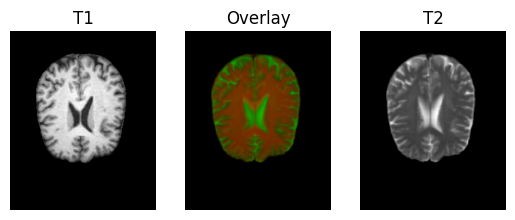

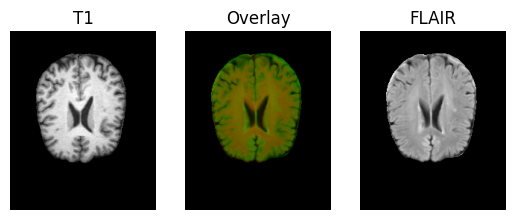

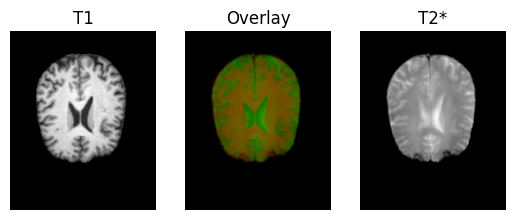

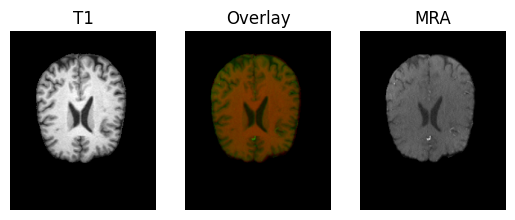

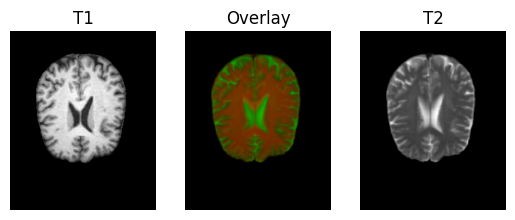

In [3]:
from dipy.viz import regtools
import nibabel as nib

flair_img = nib.load("../data/oasis-3-strip-2/OAS30001_MR_d2430/sub-OAS30001_ses-d2430_FLAIR_proc.nii.gz")
mra_img = nib.load("../data/oasis-3-strip-2/OAS30001_MR_d2430/sub-OAS30001_ses-d2430_acq-TOF_angio_proc.nii.gz")
t2_img = nib.load("../data/oasis-3-strip-2/OAS30001_MR_d2430/sub-OAS30001_ses-d2430_acq-TSE_T2w_proc.nii.gz")
t2_star_img = nib.load("../data/oasis-3-strip-2/OAS30001_MR_d2430/sub-OAS30001_ses-d2430_T2star_proc.nii.gz")
t1_ref_img = nib.load("../data/oasis-3-strip-2/OAS30001_MR_d2430/sub-OAS30001_ses-d2430_T1w_proc.nii.gz")

t1_data = t1_ref_img.get_fdata()
t2_data = t2_img.get_fdata()
t2_star_data = t2_star_img.get_fdata()
mra_data = mra_img.get_fdata()
flair_data = flair_img.get_fdata()

regtools.overlay_slices(t1_data, flair_data, 145, 2,
                         "T1", "FLAIR", fname="FLAIR", dpi=500)
regtools.overlay_slices(t1_data, t2_star_data, 145, 2,
                         "T1", "T2*", fname="T2star", dpi=500)
regtools.overlay_slices(t1_data, mra_data, 145, 2,
                         "T1", "MRA", fname="MRA", dpi=500)
regtools.overlay_slices(t1_data, t2_data, 145, 2,
                         "T1", "T2", fname="T2", dpi=500)

## After registration to T1

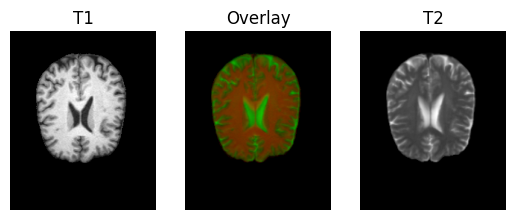

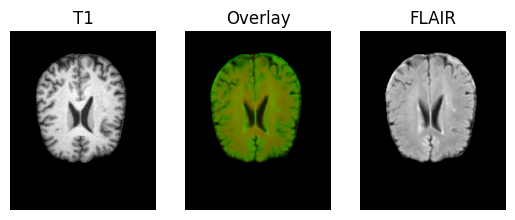

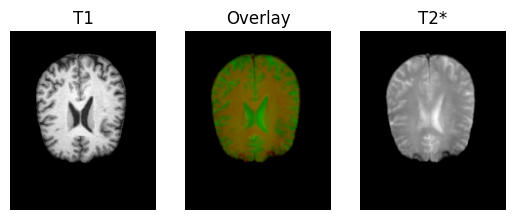

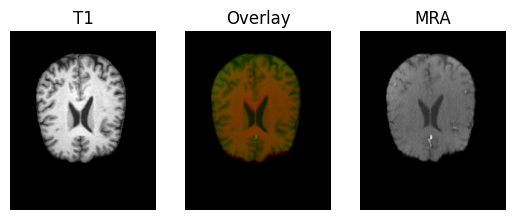

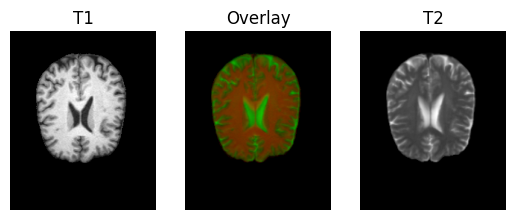

In [4]:
from dipy.viz import regtools
import nibabel as nib

flair_img = nib.load("../data/oasis-3-3-regt1/OAS30001_MR_d2430/sub-OAS30001_ses-d2430_FLAIR_proc.nii.gz")
mra_img = nib.load("../data/oasis-3-3-regt1/OAS30001_MR_d2430/sub-OAS30001_ses-d2430_acq-TOF_angio_proc.nii.gz")
t2_img = nib.load("../data/oasis-3-3-regt1/OAS30001_MR_d2430/sub-OAS30001_ses-d2430_acq-TSE_T2w_proc.nii.gz")
t2_star_img = nib.load("../data/oasis-3-3-regt1/OAS30001_MR_d2430/sub-OAS30001_ses-d2430_T2star_proc.nii.gz")
t1_ref_img = nib.load("../data/oasis-3-3-regt1/OAS30001_MR_d2430/sub-OAS30001_ses-d2430_T1w_proc.nii.gz")

t1_data = t1_ref_img.get_fdata()
t2_data = t2_img.get_fdata()
t2_star_data = t2_star_img.get_fdata()
mra_data = mra_img.get_fdata()
flair_data = flair_img.get_fdata()

regtools.overlay_slices(t1_data, flair_data, 145, 2,
                         "T1", "FLAIR", fname="FLAIR", dpi=500)
regtools.overlay_slices(t1_data, t2_star_data, 145, 2,
                         "T1", "T2*", fname="T2star", dpi=500)
regtools.overlay_slices(t1_data, mra_data, 145, 2,
                         "T1", "MRA", fname="MRA", dpi=500)
regtools.overlay_slices(t1_data, t2_data, 145, 2,
                         "T1", "T2", fname="T2", dpi=500)